# Outline for Project

* Make streamlit app, present, and deploy from GitHub (https://www.youtube.com/watch?v=B0MUXtmSpiA)

* Use machine learning in obvious way (sklearn, more than one estimator, cross validation, score, hyperparameter tuning, feature engineering)

* Project will be training a support vector machine (SVM) machine learning model on METABRIC gene expression, copy number, and methylation numeric data to predict intrinsic subtype of breast cancer

* This is meaningful as prognostic outcomes can be inferred for every additional patient. Some with low risk scores may not have to undergo double mastectomies, while others with high risk can be treated more aggressively earlier.

* Have the user be able to select whichever machine learning model they want

* Include picture of PAM50 ROC curve, then have the entire list of genes the user can train the model on. Otherwise, have them select a random number of genes to train the model on and see the change in efficacy

* Use the st.metric setting to show the change in efficacy from each model to the next

0.47229551451187335


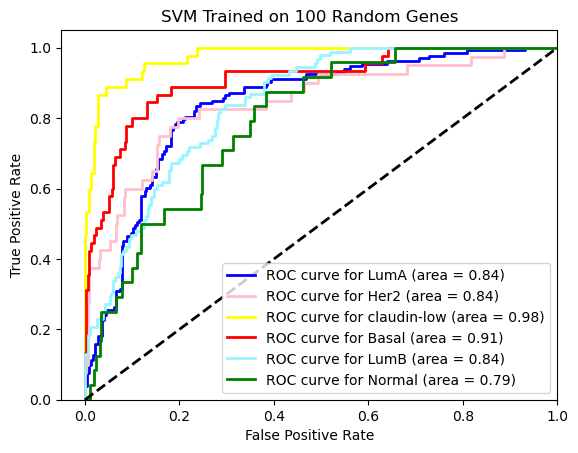

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st
import numpy as np
from sklearn import neighbors
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn import metrics
from scipy import stats
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
from sklearn import svm, datasets


df = pd.read_csv("Combined_Metabric_ML_Data.csv")
species = df.pop("CLAUDIN_SUBTYPE")
df = df.T

random_number = 100

df = df.sample(n=random_number, random_state=0)
df = df.astype(dtype="float64")
df = df.T
lut = dict(zip(species.unique(), [0, 1, 2, 3, 4, 5, 6]))
numbers = species.map(lut)
y = np.array(numbers)
array = df.to_numpy().astype('int32')
array = array + abs(df.min().min())
normalized_array = stats.zscore(array, axis=None, nan_policy='omit')
X = normalized_array

test_fraction = 0.2
random_start = 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_fraction, random_state=random_start)

#my_classifier = neighbors.KNeighborsClassifier()

y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5])
n_classes = y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=0))

y_score = classifier.fit(X_train, y_train).decision_function(X_test)
print(classifier.score(X_test, y_test))

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
subtypes = ["LumA","Her2","claudin-low","Basal","LumB","Normal"]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(["blue","pink","yellow","red","#98F5FF","green"])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve for '+subtypes[i]+' (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Trained on '+str(random_number)+' Random Genes')
plt.legend(loc="lower right")
plt.show()